# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)
from sklearn.impute import SimpleImputer
from pprint import pprint 

In [2]:
# %pwd

# Load Spotify Dataset (CSV file)

In [3]:
spotify_df = pd.read_csv("./Spotfiy_Persian_Artists.csv")
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [4]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [5]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

## Q: Get number of songs by each of the artists in descending order

In [6]:
artists_df = spotify_df.groupby(['artist_name'])
songs_count_df = artists_df['track_id'].count().rename('songs_count').to_frame()
songs_count_df = songs_count_df.sort_values('songs_count', ascending=False).reset_index()
songs_count_df

,artist_name,songs_count
0,Mohammadreza Shajarian,554
1,Hossein Alizadeh,545
2,Reza Sadeghi,507
3,Dariush,465
4,Alireza Eftekhari,439
...,...,...
64,Nasser Abdollahi,22
65,Mohammad Golriz,17
66,Ebrahim Monsefi,16
67,Farman Fathalian,10


## Q: Get the average duration of songs by each of the artists in minutes

In [7]:
artists_df = spotify_df.groupby(['artist_name'])

# find number of songs
songs_count_df = artists_df['track_id'].count().rename('songs_count').to_frame()

# find sum of songs duration (minutes)
songs_duration_df = artists_df['duration_ms'].sum().rename('songs_duration').to_frame().reset_index()
songs_duration_df['songs_duration'] = songs_duration_df['songs_duration']/60000

# find average duration of songs
songs_avgduration_df = pd.merge(songs_count_df, songs_duration_df, on='artist_name', how='inner')
songs_avgduration_df = songs_avgduration_df.sort_values('songs_count', ascending=False).reset_index(drop=True)
songs_avgduration_df['songs_avg_duration'] = songs_avgduration_df['songs_duration']/songs_avgduration_df['songs_count']
songs_avgduration_df

,artist_name,songs_count,songs_duration,songs_avg_duration
0,Mohammadreza Shajarian,554,3469.975350,6.263493
1,Hossein Alizadeh,545,2580.861383,4.735525
2,Reza Sadeghi,507,2137.813233,4.216594
3,Dariush,465,2691.959433,5.789160
4,Alireza Eftekhari,439,2661.025200,6.061561
...,...,...,...,...
64,Nasser Abdollahi,22,112.303650,5.104711
65,Mohammad Golriz,17,92.141933,5.420114
66,Ebrahim Monsefi,16,70.607300,4.412956
67,Farman Fathalian,10,45.593050,4.559305


## Q: list of artist's unique names

In [8]:
artists_list = spotify_df['artist_name'].unique()
artists_list

array(['Salar Aghili', 'Mohsen Yeganeh', 'Mehdi Yarrahi',
       'Mohammadreza Shajarian', 'Morteza Pashaei', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Mohsen Chavoshi', 'Reza Sadeghi',
       'Abdolhosein Mokhtabad', 'Alireza Assar', 'Roozbeh Nematollahi',
       'Hossein Alizadeh', 'Peyman Yazdanian', 'Kayhan Kalhor',
       'Siavash Ghomayshi', 'Benyamin Bahadori', 'Alireza Eftekhari',
       'Majid Akhshabi', 'Faramarz Aslani', 'Iraj Bastami',
       'Ehsan Khajeh Amiri', 'Alireza Ghorbani', 'Parviz Meshkatian',
       'Mohammad Reza Lotfi', 'Dang Show', 'Nasser Abdollahi',
       'Soheil Nafissi', 'Farhad Mehrad', 'Afshin Moghaddam',
       'Koveyti Poor', 'Mohammad Golriz', 'Abbas Ghaderi',
       'Javad Yassari', 'Sattar', 'Mohsen Sharifian', 'Babak Jahanbakhsh',
       'Mazyar Fallahi', 'Mohammad Alizadeh', 'Farzad Farzin',
       'Ali Zand Vakili', 'Amirabbas Golab', 'Hamid Askari',
       'Mohsen Namjoo', 'Hamed Homayoun', 'Kaveh Deylami', 'Hatam Asgari',
       'Hamid

## Q: Plot average duration of tracks by year

In [9]:
year_df = spotify_df.groupby(['album_release_year'])

# find number of songs
songs_count_df = year_df['track_id'].count().rename('songs_count').to_frame()

# find sum of songs duration (minutes)
songs_duration_df = year_df['duration_ms'].sum().rename('sum_duration').to_frame().reset_index()
songs_duration_df['sum_duration'] = songs_duration_df['sum_duration']/60000

# find average duration of songs
songs_avgduration_df = pd.merge(songs_count_df, songs_duration_df, on='album_release_year', how='inner')
songs_avgduration_df = songs_avgduration_df.sort_values('album_release_year', ascending=True).reset_index(drop=True)
songs_avgduration_df['avg_duration'] = songs_avgduration_df['sum_duration']/songs_avgduration_df['songs_count']

# delete row with "album_release_year = 0"
songs_avgduration_df = songs_avgduration_df[songs_avgduration_df.album_release_year != 0]

# show head of dataframe
songs_avgduration_df.head()

,album_release_year,songs_count,sum_duration,avg_duration
1,1974,5,46.257100,9.251420
2,1975,10,40.320350,4.032035
3,1976,13,60.515683,4.655053
4,1977,21,157.561900,7.502948
5,1978,6,43.023183,7.170531


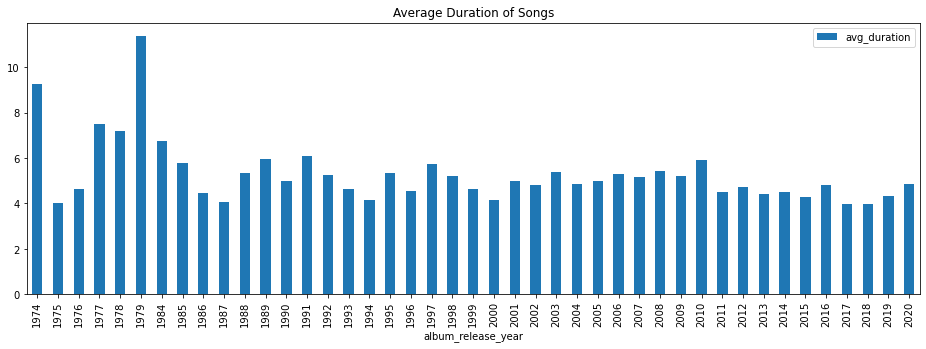

In [10]:
# plot average duration of tracks by year
songs_avgduration_df.plot.bar(x='album_release_year', y='avg_duration', title='Average Duration of Songs',figsize=(16, 5));

## Q: Plot average loudness of tracks by year

In [11]:
year_df = spotify_df.groupby(['album_release_year'])

# find number of songs in each year
songs_count_df = year_df['track_id'].count().rename('songs_count').to_frame()

# find sum of songs loudness in a year
songs_loudness_df = year_df['loudness'].sum().rename('sum_loudness').to_frame().reset_index()

# find average loudness of songs
songs_avgloudness_df = pd.merge(songs_count_df, songs_loudness_df, on='album_release_year', how='inner')
songs_avgloudness_df = songs_avgloudness_df.sort_values('album_release_year', ascending=True).reset_index(drop=True)
songs_avgloudness_df['avg_loudness'] = songs_avgloudness_df['sum_loudness']/songs_avgloudness_df['songs_count']

# delete row with "album_release_year = 0"
songs_avgloudness_df = songs_avgloudness_df[songs_avgloudness_df.album_release_year != 0]

# show head of dataframe
songs_avgloudness_df.head()

,album_release_year,songs_count,sum_loudness,avg_loudness
1,1974,5,-81.979,-16.395800
2,1975,10,-157.959,-15.795900
3,1976,13,-155.395,-11.953462
4,1977,21,-271.685,-12.937381
5,1978,6,-73.251,-12.208500


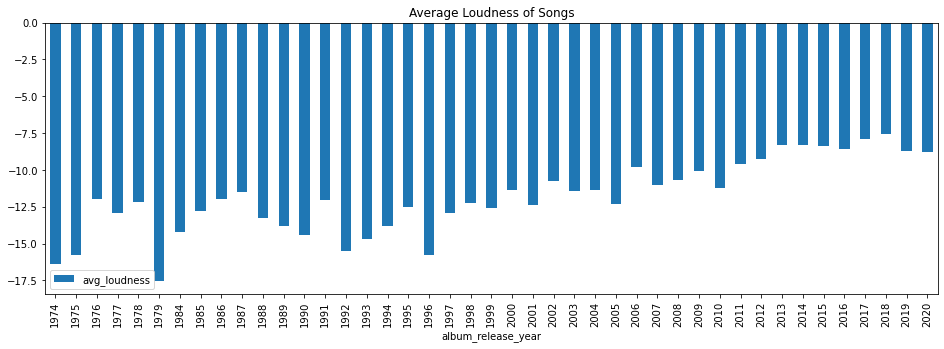

In [12]:
# plot average loudness of tracks by year
songs_avgloudness_df.plot.bar(x='album_release_year', y='avg_loudness', title='Average Loudness of Songs',figsize=(16, 5));

## Q: Music attributes of songs over the years


In [13]:
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]

# find average of attributes over the years
year_df = spotify_df.dropna().groupby(['album_release_year'])
songs_attributes_df = pd.DataFrame()
songs_attributes_df['songs_count']  = year_df['track_id'].count()
songs_attributes_df['acousticness'] = year_df['acousticness'].sum()/songs_attributes_df['songs_count']
songs_attributes_df['danceability'] = year_df['danceability'].sum()/songs_attributes_df['songs_count']
songs_attributes_df['energy']       = year_df['energy'].sum()/songs_attributes_df['songs_count']
songs_attributes_df['speechiness']  = year_df['speechiness'].sum()/songs_attributes_df['songs_count']
songs_attributes_df['liveness']     = year_df['liveness'].sum()/songs_attributes_df['songs_count']
songs_attributes_df['valence']      = year_df['valence'].sum()/songs_attributes_df['songs_count']

target_df = songs_attributes_df[target_cols].reset_index()
target_df

,album_release_year,acousticness,danceability,energy,speechiness,liveness,valence
0,1976,0.826000,0.446500,0.351000,0.038100,0.211000,0.551000
1,1985,0.876000,0.696000,0.524000,0.050700,0.334000,0.504000
2,1988,0.972000,0.457500,0.317500,0.112000,0.131500,0.602500
3,1991,0.952333,0.380667,0.234667,0.038067,0.126333,0.355000
4,1992,0.107000,0.739000,0.417000,0.149000,0.080300,0.545000
5,1996,0.907900,0.422200,0.165090,0.056570,0.133400,0.319800
6,1997,0.047700,0.708000,0.778000,0.052800,0.253000,0.884000
7,1999,0.034000,0.708000,0.894000,0.055500,0.210000,0.717000
8,2000,0.178000,0.503000,0.623000,0.043900,0.062000,0.232000
9,2001,0.829667,0.460667,0.449333,0.069200,0.189667,0.589333


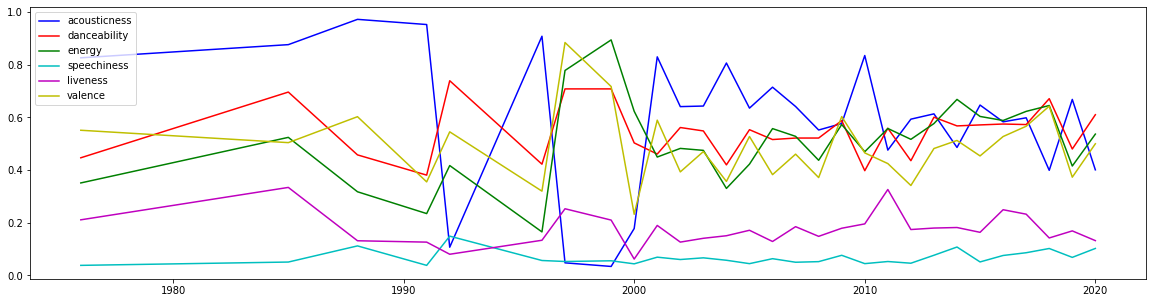

In [14]:
# plot target attributes

x  = target_df['album_release_year']
y1 = target_df['acousticness']
y2 = target_df['danceability']
y3 = target_df['energy']
y4 = target_df['speechiness']
y5 = target_df['liveness']
y6 = target_df['valence']

plt.figure(figsize=(20,5))
plt.plot(x, y1, label="acousticness" , color='b')
plt.plot(x, y2, label="danceability" , color='r')
plt.plot(x, y3, label="energy" , color='g')
plt.plot(x, y4, label="speechiness" , color='c')
plt.plot(x, y5, label="liveness" , color='m')
plt.plot(x, y6, label="valence" , color='y')
plt.legend()
plt.show()

## Q: Plot top 10 popular tracks (Bar Chart)

In [15]:
popular_songs_df = spotify_df.sort_values('popularity', ascending=False)
popular_songs_df = popular_songs_df.drop_duplicates(subset="track_id", keep="first").reset_index().head(10)
popular_songs_df[['track_name', 'artist_name', 'popularity']]

,track_name,artist_name,popularity
0,Gentleman,Sasy,48.0
1,Doctor,Sasy,46.0
2,Asheghaneh,Farzad Farzin,43.0
3,Zolf,Mohsen Namjoo,42.0
4,Age Ye Rooz,Faramarz Aslani,42.0
5,Behet Ghol Midam,Mohsen Yeganeh,42.0
6,Navazesh,Amir Tataloo,41.0
7,Gole Yakh,Kourosh Yaghmaei,41.0
8,Dooset Daram,Mohsen Yeganeh,40.0
9,Saaghiya,Sasy,40.0


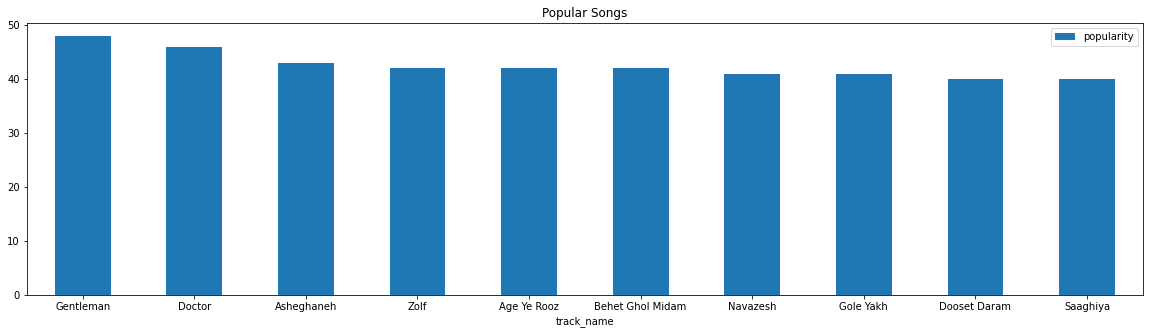

In [16]:
popular_songs_df.plot.bar(x='track_name', y='popularity', rot=0, title='Popular Songs',figsize=(20, 5));

## Q: Plot top 10 popular artist (Bar Chart)

In [17]:
# group tracks by artists and drop rows with null popularity
artists_df = spotify_df[spotify_df['popularity'].notna()].groupby(['artist_name'])

# find number of songs for each artist
songs_count_df = artists_df['track_id'].count().rename('songs_count').to_frame()

# find sum of popularity
songs_popularity_df = artists_df['popularity'].sum().rename('sum_popularity').to_frame().reset_index()

# find average popularity of songs
songs_avgpopularity_df = pd.merge(songs_count_df, songs_popularity_df, on='artist_name', how='inner').reset_index(drop=True)
songs_avgpopularity_df['avg_popularity'] = songs_avgpopularity_df['sum_popularity']/songs_avgpopularity_df['songs_count']
songs_avgpopularity_df = songs_avgpopularity_df.sort_values('avg_popularity', ascending=False).reset_index(drop=True).head(10)
songs_avgpopularity_df

,artist_name,songs_count,sum_popularity,avg_popularity
0,Sasy,10,381.0,38.100000
1,Amir Tataloo,10,365.0,36.500000
2,Farzad Farzin,10,364.0,36.400000
3,Moein,10,352.0,35.200000
4,Mohsen Namjoo,10,349.0,34.900000
5,Mohsen Yeganeh,10,339.0,33.900000
6,Morteza Pashaei,20,670.0,33.500000
7,Homayoun Shajarian,13,433.0,33.307692
8,Dariush,10,333.0,33.300000
9,Siavash Ghomayshi,30,978.0,32.600000


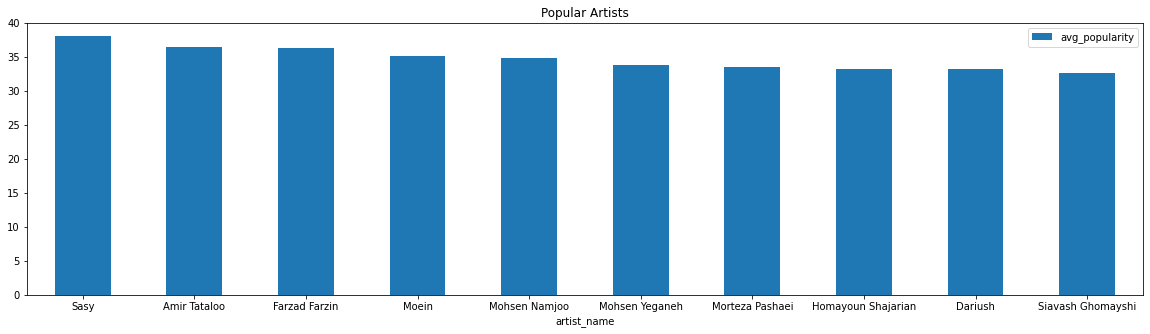

In [18]:
songs_avgpopularity_df.plot.bar(x='artist_name', y='avg_popularity', rot=0, title='Popular Artists',figsize=(20, 5));

## Q: Plot correlation matrix's heatmap
What are the most correlated features with `duration_ms` and `popularity`?

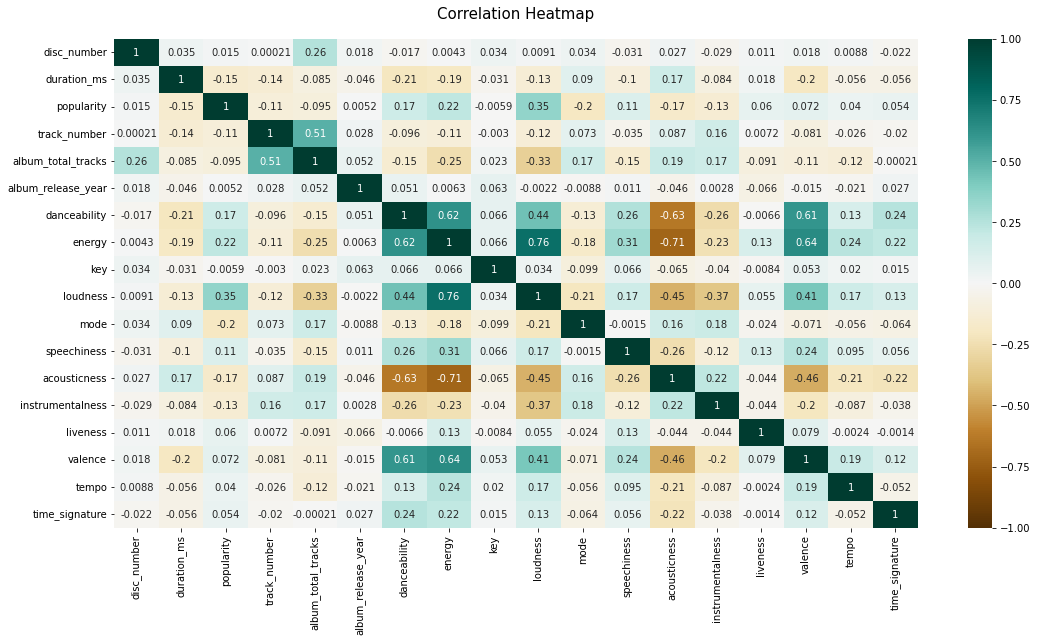

In [19]:
# plot heatmap for all numeric features

numeric_df = spotify_df.select_dtypes(include=[np.number])
numeric_df.dropna()

plt.figure(figsize=(18, 9))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=20);
plt.show()

### 1. features correlating with `duration_ms`

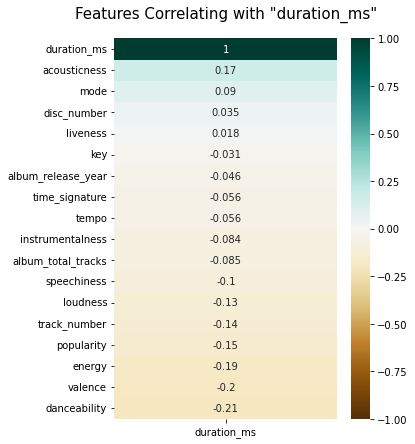

In [20]:
# features correlating with duration_ms
plt.figure(figsize=(5, 7))
heatmap = sns.heatmap(numeric_df.corr()[['duration_ms']].sort_values(by='duration_ms', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with "duration_ms"', fontdict={'fontsize':15}, pad=20);

### 2. features correlating with `popularity`

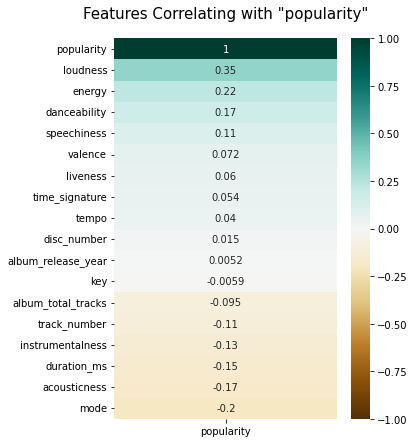

In [21]:
# features correlating with popularity
plt.figure(figsize=(5, 7))
heatmap = sns.heatmap(numeric_df.corr()[['popularity']].sort_values(by='popularity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with "popularity"', fontdict={'fontsize':15}, pad=20);

## Q: Plot box-plot for each feature 
Compare box-plot values of `energy` and `liveness`

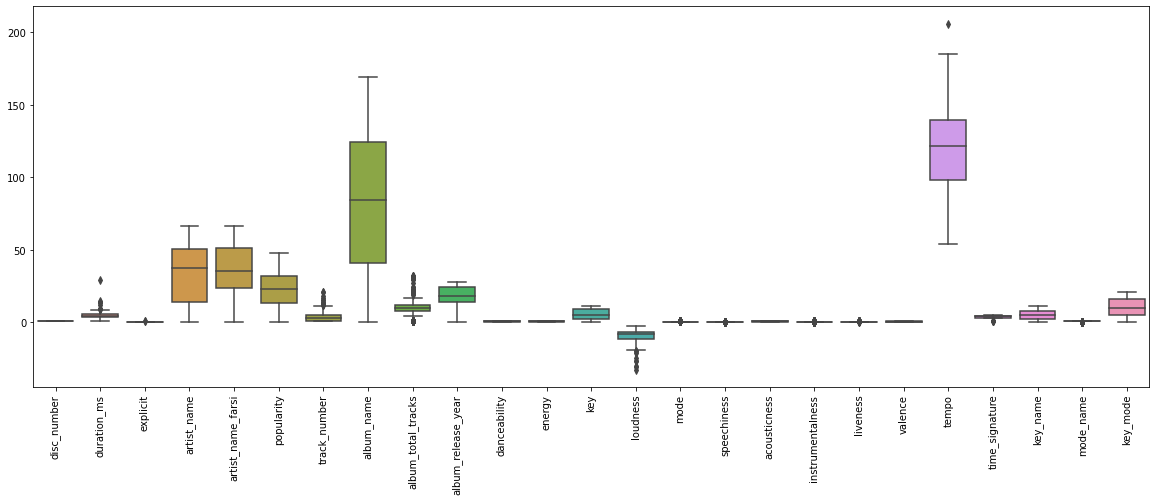

In [22]:
new_df = spotify_df.copy().dropna()
dropped_columns = ['track_id', 'track_name', 'track_name_farsi', 'album_href', 'album_id', 'album_release_date', 'track_href']
new_df.drop(dropped_columns, inplace=True, axis=1)
new_df['duration_ms'] = new_df['duration_ms']/60000

# convert categorical values into numerical values
le = LabelEncoder()
new_df['explicit'] = le.fit_transform(new_df['explicit'])
new_df['artist_name'] = le.fit_transform(new_df['artist_name'])
new_df['artist_name_farsi'] = le.fit_transform(new_df['artist_name_farsi'])
new_df['album_name'] = le.fit_transform(new_df['album_name'])
new_df['album_release_year'] = le.fit_transform(new_df['album_release_year'])
new_df['key_name'] = le.fit_transform(new_df['key_name'])
new_df['mode_name'] = le.fit_transform(new_df['mode_name'])
new_df['key_mode'] = le.fit_transform(new_df['key_mode'])

# plot box-plot
plt.figure(figsize=(20, 7))
ax = sns.boxplot(data=new_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

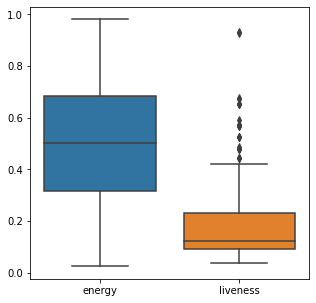

In [23]:
# plot box-plot for energy and liveness
plt.figure(figsize=(5, 5))
ax = sns.boxplot(data=new_df[['energy', 'liveness']])
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

## Q: Missing values 
How many `nan` values are there in each column?

In [24]:
spotify_df.isna().sum().to_frame(name='cnt_nan')

,cnt_nan
track_id,0
disc_number,0
duration_ms,0
explicit,0
track_name,0
track_name_farsi,10020
artist_name,0
artist_name_farsi,0
popularity,9701
track_number,0


# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.

In [25]:
# fill categorical features with "None"
categorical_columns = spotify_df.select_dtypes(exclude=[np.number]).columns
imputer_null = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="None")
imputer_null.fit(spotify_df[categorical_columns])
spotify_df[categorical_columns] = imputer_null.transform(spotify_df[categorical_columns])

# fill numerical features with "mean"
numerical_columns = spotify_df.select_dtypes(include=[np.number]).columns
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_mean.fit(spotify_df[numerical_columns])
spotify_df[numerical_columns] = imputer_mean.transform(spotify_df[numerical_columns])

spotify_df

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1.0,446880.0,False,Ghazale Taze,None,Salar Aghili,سالار عقیلی,20.113856,1.0,...,0.0299,0.839,0.000035,0.1360,0.3300,131.913,3.0,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1.0,851920.0,False,Ayeeneye Hosn,None,Salar Aghili,سالار عقیلی,20.113856,2.0,...,0.0414,0.970,0.000360,0.0812,0.3460,105.634,4.0,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1.0,293160.0,False,Tarke Eshgh,None,Salar Aghili,سالار عقیلی,20.113856,3.0,...,0.0349,0.664,0.002070,0.1100,0.5010,94.651,5.0,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1.0,648720.0,False,Moghbacheye Bade Foroosh,None,Salar Aghili,سالار عقیلی,20.113856,4.0,...,0.0451,0.915,0.006580,0.2120,0.4450,110.967,5.0,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1.0,273480.0,False,Bigharar,None,Salar Aghili,سالار عقیلی,20.113856,5.0,...,0.0334,0.657,0.000008,0.1200,0.4100,148.053,1.0,C,minor,C minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,4pEbf7VQrO4StzbqdFOnr5,1.0,397505.0,False,Zarbie Bayat Tork (Che Danestam),None,Shahram Nazeri,شهرام ناظري,20.113856,19.0,...,0.0452,0.946,0.005460,0.3530,0.3960,146.591,5.0,E,minor,E minor
10628,6umKGf6TO7aRXvJWkP6WSy,1.0,3522173.0,False,Conserte Asatid,None,Shahram Nazeri,شهرام ناظري,20.113856,1.0,...,0.0690,0.982,0.061400,0.6670,0.1610,72.379,3.0,F,minor,F minor
10629,5KiMQApCqUVNObTO004MWI,1.0,3402706.0,False,Soofi Nameh,None,Shahram Nazeri,شهرام ناظري,20.113856,1.0,...,0.0350,0.883,0.019400,0.2630,0.1390,86.645,4.0,G#,major,G# major
10630,4w1VKm2kjmA2Xz4YSMBfIn,1.0,3342733.0,False,Saghi Nameh,None,Shahram Nazeri,شهرام ناظري,20.113856,1.0,...,0.0369,0.842,0.223000,0.7980,0.2100,77.819,3.0,G#,major,G# major


# Determine your desired features here

In [26]:
music_feature_cols = [
    'popularity', 'danceability', 'energy', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'time_signature'
]

In [27]:
tracks_feature_df = spotify_df[music_feature_cols + ['artist_name']].dropna()
tracks_feature_df

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name
0,20.113856,0.437,0.390,-7.170,0.0,0.0299,0.839,0.000035,0.1360,0.3300,131.913,3.0,Salar Aghili
1,20.113856,0.379,0.146,-10.008,1.0,0.0414,0.970,0.000360,0.0812,0.3460,105.634,4.0,Salar Aghili
2,20.113856,0.437,0.453,-5.392,0.0,0.0349,0.664,0.002070,0.1100,0.5010,94.651,5.0,Salar Aghili
3,20.113856,0.488,0.138,-12.287,0.0,0.0451,0.915,0.006580,0.2120,0.4450,110.967,5.0,Salar Aghili
4,20.113856,0.301,0.443,-5.702,0.0,0.0334,0.657,0.000008,0.1200,0.4100,148.053,1.0,Salar Aghili
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,20.113856,0.356,0.499,-10.805,0.0,0.0452,0.946,0.005460,0.3530,0.3960,146.591,5.0,Shahram Nazeri
10628,20.113856,0.318,0.163,-17.538,0.0,0.0690,0.982,0.061400,0.6670,0.1610,72.379,3.0,Shahram Nazeri
10629,20.113856,0.213,0.218,-15.865,1.0,0.0350,0.883,0.019400,0.2630,0.1390,86.645,4.0,Shahram Nazeri
10630,20.113856,0.242,0.304,-13.286,1.0,0.0369,0.842,0.223000,0.7980,0.2100,77.819,3.0,Shahram Nazeri


## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models. 

In [28]:
# normalize data
scaler = StandardScaler()
columns = tracks_feature_df.columns.drop(['popularity', 'artist_name']) 
tracks_feature_df[columns] = scaler.fit_transform(tracks_feature_df[columns])

tracks_feature_df

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name
0,20.113856,-0.428643,-0.440144,0.629863,-0.772888,-0.561985,0.721928,-0.448047,-0.369816,-0.504217,0.420102,-1.045944,Salar Aghili
1,20.113856,-0.765201,-1.449424,0.013646,1.293849,-0.400182,1.134163,-0.446904,-0.723920,-0.437288,-0.460848,0.523636,Salar Aghili
2,20.113856,-0.428643,-0.179551,1.015921,-0.772888,-0.491636,0.171232,-0.440888,-0.537822,0.211093,-0.829030,2.093217,Salar Aghili
3,20.113856,-0.132704,-1.482515,-0.481195,-0.772888,-0.348124,0.961087,-0.425022,0.121278,-0.023160,-0.282070,2.093217,Salar Aghili
4,20.113856,-1.217813,-0.220915,0.948610,-0.772888,-0.512741,0.149205,-0.448140,-0.473204,-0.169569,0.961163,-4.185105,Salar Aghili
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,20.113856,-0.898663,0.010723,-0.159407,-0.772888,-0.346717,1.058639,-0.428962,1.032386,-0.228132,0.912152,2.093217,Shahram Nazeri
10628,20.113856,-1.119167,-1.379105,-1.621347,-0.772888,-0.011856,1.171925,-0.232174,3.061378,-1.211161,-1.575654,-1.045944,Shahram Nazeri
10629,20.113856,-1.728453,-1.151603,-1.258088,1.293849,-0.490229,0.860389,-0.379924,0.450827,-1.303190,-1.097415,0.523636,Shahram Nazeri
10630,20.113856,-1.560174,-0.795874,-0.698108,1.293849,-0.463496,0.731369,0.336312,3.907869,-1.006189,-1.393289,-1.045944,Shahram Nazeri


## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)

(10632, 2)


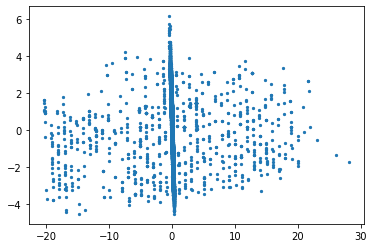

In [29]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)

(10632, 3)


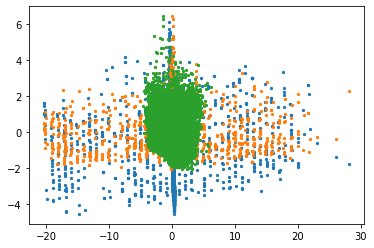

In [30]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)

## Regression

In [31]:
# Set random seed to make results reproducible 
RANDOM_SEED = 42

In [32]:
df = spotify_df
regression_features = [    
    'danceability', 'energy', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]
x=df.loc[:, regression_features].values
y=df.loc[:,'popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [33]:
regressor = LinearRegression(
    # pass parameters
    fit_intercept=True, positive=True, copy_X=True
)
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

20.492607665815893
[0.13089721 0.         0.06176067 0.         0.95350395 0.
 0.04015255 0.         0.         0.         0.02707995]


## Evaluate Regression Algorithm

In [34]:
y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output

,Actual,Predicted
0,13.000000,20.200080
1,20.113856,20.528649
2,20.113856,20.431041
3,20.113856,20.058855
4,20.113856,20.142526
...,...,...
3185,20.113856,20.388015
3186,12.000000,19.989394
3187,20.113856,19.530686
3188,20.113856,20.081869


In [35]:
# Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9426258864914039
Mean Squared Error: 8.825146256451438
Root Mean Squared Error: 2.9707147719785283


# Classification

## Prepare Labels

In [36]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh', 
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani', 
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami', 
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

## Add `is_sonnati` feature column 
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

In [37]:
tracks_feature_df['is_sonnati'] = [1 if name in sonnati_artists else 0 for name in tracks_feature_df['artist_name']]
tracks_feature_df = tracks_feature_df.drop(columns=['artist_name', 'popularity'], axis=1)
tracks_feature_df

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_sonnati
0,-0.428643,-0.440144,0.629863,-0.772888,-0.561985,0.721928,-0.448047,-0.369816,-0.504217,0.420102,-1.045944,1
1,-0.765201,-1.449424,0.013646,1.293849,-0.400182,1.134163,-0.446904,-0.723920,-0.437288,-0.460848,0.523636,1
2,-0.428643,-0.179551,1.015921,-0.772888,-0.491636,0.171232,-0.440888,-0.537822,0.211093,-0.829030,2.093217,1
3,-0.132704,-1.482515,-0.481195,-0.772888,-0.348124,0.961087,-0.425022,0.121278,-0.023160,-0.282070,2.093217,1
4,-1.217813,-0.220915,0.948610,-0.772888,-0.512741,0.149205,-0.448140,-0.473204,-0.169569,0.961163,-4.185105,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10627,-0.898663,0.010723,-0.159407,-0.772888,-0.346717,1.058639,-0.428962,1.032386,-0.228132,0.912152,2.093217,1
10628,-1.119167,-1.379105,-1.621347,-0.772888,-0.011856,1.171925,-0.232174,3.061378,-1.211161,-1.575654,-1.045944,1
10629,-1.728453,-1.151603,-1.258088,1.293849,-0.490229,0.860389,-0.379924,0.450827,-1.303190,-1.097415,0.523636,1
10630,-1.560174,-0.795874,-0.698108,1.293849,-0.463496,0.731369,0.336312,3.907869,-1.006189,-1.393289,-1.045944,1


In [38]:
tracks_feature_df.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_sonnati
count,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,10632.000000
mean,-2.994010e-16,-5.881091e-17,-2.486098e-16,-8.019670e-18,-8.019670e-18,-3.983103e-16,7.485025e-17,-7.485025e-17,-1.924721e-16,3.421726e-16,-8.019670e-17,0.358728
std,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,0.479650
min,-2.964434e+00,-2.049304e+00,-5.934864e+00,-7.728879e-01,-9.826719e-01,-1.918195e+00,-4.481700e-01,-1.248615e+00,-1.884641e+00,-4.002013e+00,-5.754685e+00,0.000000
25%,-8.058199e-01,-8.206920e-01,-5.634327e-01,-7.728879e-01,-4.747521e-01,-8.735159e-01,-4.481700e-01,-6.295786e-01,-8.106294e-01,-8.134842e-01,-1.045944e+00,0.000000
50%,-8.047930e-02,-3.064107e-02,2.179660e-01,-7.728879e-01,-3.509379e-01,3.631892e-01,-4.478620e-01,-3.892012e-01,-1.235549e-01,2.329099e-02,5.236364e-01,0.000000
75%,8.189431e-01,8.131829e-01,7.497731e-01,1.293849e+00,-3.682961e-02,8.572419e-01,-3.957539e-01,3.668246e-01,7.632628e-01,6.252294e-01,5.236364e-01,1.000000
max,2.629393e+00,2.074783e+00,2.050765e+00,1.293849e+00,1.222887e+01,1.215981e+00,3.052098e+00,5.161450e+00,2.214799e+00,3.371699e+00,2.093217e+00,1.000000


## Create Classification Dataset

In [39]:
x = tracks_feature_df.reset_index().drop(columns=['is_sonnati']).values
y = tracks_feature_df['is_sonnati'].values

In [40]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(10632, 12)
y.shape=(10632,)


In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)

## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`) 


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [42]:
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset
    
    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)
    
    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
    )
    
    # train model
    classifier = make_pipeline(StandardScaler(), model)
    
    # ignore index column for training and inferencing
    classifier.fit(x_train[:, 1:], y_train)
    y_pred = classifier.predict(x_test[:, 1:])
    
    # export predictions to submit to kaggle
    pd.DataFrame({'id': x_test[:, 0].astype(int), 'predicted': y_pred}, dtype=str).to_csv('spotify_pred.csv', index=False)
    
    # evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return eval_metrics

In [43]:
# here is an example
dataset = (x, y)
pprint(fit_and_eval(KNeighborsClassifier(n_neighbors=1), dataset))

{'acc': 0.8225705329153605,
 'confusion': array([[1802,  293],
       [ 273,  822]], dtype=int64),
 'f1': 0.7438914027149323,
 'precision': 0.737219730941704,
 'recall': 0.7506849315068493}


In [44]:
# the best model you want to be evaluated. Just pass do the same way as above cell
dataset = (x, y)
pprint(fit_and_eval(RandomForestClassifier(criterion='entropy', bootstrap=False), dataset))

{'acc': 0.8733542319749217,
 'confusion': array([[1897,  198],
       [ 206,  889]], dtype=int64),
 'f1': 0.8148487626031163,
 'precision': 0.8178472861085556,
 'recall': 0.8118721461187215}
